<a href="https://colab.research.google.com/github/nikhiltejarudraram/Nikhil_INFO5731_SPRING2025/blob/main/Rudraram_Nikhil_Assignment_3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [21]:
import pandas as pd
import re
from collections import defaultdict


#Load the Data (first 100 tweets)

df = pd.read_csv('cleaned_extracted_tweets.csv')
df = df.head(100)  # use only the first 100 tweets

#N-gram Analysis Functions
def tokenize(text):
    """Tokenize text: remove punctuation and lower-case."""
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.lower().split()
    return tokens
def generate_ngrams(tokens, n):
    """Generate n-grams from a list of tokens."""
    return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

# Dictionaries for frequencies
bigram_freq = defaultdict(int)
trigram_freq = defaultdict(int)
word_freq = defaultdict(int)

# Process each tweet in the dataset
for text in df['Tweet Text']:
    tokens = tokenize(text)
    # Count word frequencies for probability calculation
    for token in tokens:
        word_freq[token] += 1
    # Generate and count bigrams and trigrams
    for bg in generate_ngrams(tokens, 2):
        bigram_freq[bg] += 1
    for tg in generate_ngrams(tokens, 3):
        trigram_freq[tg] += 1




# Calculate Bigram Probabilities

bigram_prob = {}
for bg, freq in bigram_freq.items():
    first_word = bg[0]
    bigram_prob[bg] = freq / word_freq[first_word]  # probability = count(bigram) / count(first word)

# Extract Noun Phrases and Build Relative Frequency Table
# For a simple heuristic, consider a "noun phrase" as any alphabetic word not in a basic stopword list.

stopwords = set(["the", "a", "an", "and", "or", "is", "are", "in", "of", "to", "with", "for", "on", "at", "by", "this", "that", "it"])

def extract_noun_phrases(text):
    # Extract only alphabetic words (ignoring numbers/punctuation)
    tokens = re.findall(r'\b[a-zA-Z]+\b', text)
    # Return tokens that are not stopwords (in lower-case)
    return [token.lower() for token in tokens if token.lower() not in stopwords]

# Build global noun phrase frequency and per-tweet frequencies
noun_phrase_global_freq = defaultdict(int)
tweet_noun_phrases = []  # list of dictionaries: one dict per tweet mapping noun phrase -> frequency

for text in df['Tweet Text']:
    noun_phrases = extract_noun_phrases(text)
    freq_dict = defaultdict(int)
    for np in noun_phrases:
        freq_dict[np] += 1
        noun_phrase_global_freq[np] += 1
    tweet_noun_phrases.append(freq_dict)

# Determine the maximum frequency for each noun phrase across the 100 tweets
noun_phrase_max = defaultdict(int)
for freq_dict in tweet_noun_phrases:
    for np, count in freq_dict.items():
        if count > noun_phrase_max[np]:
            noun_phrase_max[np] = count

# Create a table (DataFrame) with rows as tweets and columns as noun phrases.
noun_phrases_list = list(noun_phrase_global_freq.keys())
table = pd.DataFrame(0.0, index=df['Tweet ID'], columns=noun_phrases_list)

# Fill the table with relative frequencies: (frequency in tweet)/(maximum frequency of that noun phrase)
for i, freq_dict in enumerate(tweet_noun_phrases):
    tweet_id = df.loc[i, 'Tweet ID']
    for np, count in freq_dict.items():
        # Compute relative probability (typically 1 if appears once and max is 1, but tweets might have repeats)
        if noun_phrase_max[np] > 0:
            relative_prob = count / noun_phrase_max[np]
        else:
            relative_prob = 0
        table.at[tweet_id, np] = relative_prob

print("\nNoun Phrase Relative Frequency Table:")
print(table)

# Optionally, save the noun phrase table to a CSV file
table.to_csv('noun_phrase_table.csv')



Noun Phrase Relative Frequency Table:
                      do  you  lost  your  account  don    t  have  anything  \
Tweet ID                                                                       
1892354577044771143  1.0  1.0   1.0   0.5      1.0  1.0  1.0   1.0       1.0   
1892331921020993924  0.0  0.0   0.0   0.0      0.0  0.0  0.0   0.0       0.0   
1892320313402089580  0.0  0.0   0.0   0.5      0.0  0.0  0.0   0.0       0.0   
1892318509406748956  0.0  0.0   0.0   0.0      0.0  0.0  0.0   0.0       0.0   
1892278618589364491  0.0  0.0   0.0   0.0      0.0  0.0  0.0   0.0       0.0   
...                  ...  ...   ...   ...      ...  ...  ...   ...       ...   
1890047927147708909  0.0  0.0   0.0   0.0      0.0  0.0  0.0   0.0       0.0   
1890015935618261293  0.0  0.0   0.0   0.5      0.0  0.0  0.0   0.0       0.0   
1889987837476610160  0.0  0.0   0.0   0.0      0.0  0.0  0.0   0.0       0.0   
1889974054775341326  0.0  0.0   0.0   0.0      0.0  0.0  0.0   0.0       0.0   
1

In [22]:
import pandas as pd

# Convert the bigram frequency dictionary into a DataFrame and sort by frequency
bigram_df = pd.DataFrame(list(bigram_freq.items()), columns=["Bigram", "Frequency"]).sort_values("Frequency", ascending=False)

# Convert the trigram frequency dictionary into a DataFrame and sort by frequency
trigram_df = pd.DataFrame(list(trigram_freq.items()), columns=["Trigram", "Frequency"]).sort_values("Frequency", ascending=False)

# Print the complete DataFrames
print("Bigram Frequencies:")
print(bigram_df)
print("\nTrigram Frequencies:")
print(trigram_df)


Bigram Frequencies:
                          Bigram  Frequency
20    (artificial, intelligence)         80
21            (intelligence, ai)         19
22                      (ai, ml)         18
27              (python, coding)         14
32          (programming, linux)         14
...                          ...        ...
542                   (its, not)          1
541                     (e, its)          1
540                 (capital, e)          1
539              (with, capital)          1
1394     (broker, transcendence)          1

[1395 rows x 2 columns]

Trigram Frequencies:
                                  Trigram  Frequency
20         (artificial, intelligence, ai)         19
31    (100daysofcode, programming, linux)         14
29    (javascript, rstats, 100daysofcode)         13
21                 (intelligence, ai, ml)         13
14                            (me, a, dm)         13
...                                   ...        ...
549                      (its, not

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [23]:
# Write your code here


import csv
import string
import math

def tokenize(text):
    """
    Lowercase, remove punctuation, and split text into tokens.
    """
    translator = str.maketrans('', '', string.punctuation)
    return text.lower().translate(translator).split()

def compute_tf(tokens):
    """
    Compute term frequency as raw counts for the given list of tokens.
    Returns a dictionary: {term: frequency}
    """
    tf = {}
    for token in tokens:
        tf[token] = tf.get(token, 0) + 1
    return tf

def compute_idf(documents_tf, vocab):
    """
    Compute inverse document frequency for each term in vocab.
    idf(term) = log(N / df(term)) where df(term) is the number of documents containing the term.
    documents_tf is a list of tf dictionaries for each document.
    """
    N = len(documents_tf)
    idf = {}
    for term in vocab:
        df = sum(1 for doc in documents_tf if term in doc)
        # Avoid division by zero; df should be >=1 because term is in the vocabulary.
        idf[term] = math.log(N / df) if df else 0
    return idf

def compute_tf_idf(tf, idf):
    """
    Compute TF-IDF weight for one document.
    tf: dictionary of term frequencies for the document.
    idf: dictionary of inverse document frequency for terms.
    Returns a dictionary: {term: tf*idf}
    """
    tf_idf = {}
    for term, freq in tf.items():
        tf_idf[term] = freq * idf.get(term, 0)
    return tf_idf

def dot_product(vec1, vec2):
    """
    Compute the dot product between two vectors represented as dictionaries.
    Only common terms contribute.
    """
    dp = 0
    for term in vec1:
        if term in vec2:
            dp += vec1[term] * vec2[term]
    return dp

def vector_norm(vec):
    """
    Compute the Euclidean norm of a vector represented as a dictionary.
    """
    return math.sqrt(sum(weight**2 for weight in vec.values()))

def cosine_similarity(vec1, vec2):
    """
    Compute the cosine similarity between two vectors (dict representations).
    """
    norm1 = vector_norm(vec1)
    norm2 = vector_norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot_product(vec1, vec2) / (norm1 * norm2)


# Read CSV file and process the "Tweet Text" column.
documents = []
with open('/content/cleaned_extracted_tweets.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        documents.append(row['Tweet Text'])

# Limit to first 100 documents (reviews/tweets)
documents = documents[:100]

# Tokenize documents and compute TF for each document
documents_tokens = [tokenize(doc) for doc in documents]
documents_tf = [compute_tf(tokens) for tokens in documents_tokens]

# Build vocabulary from all tokens in documents
vocab = set()
for tokens in documents_tokens:
    vocab.update(tokens)
vocab = sorted(list(vocab))  # sorted list for consistent ordering

# Compute IDF for each term in the vocabulary
idf = compute_idf(documents_tf, vocab)

# Compute TF-IDF vector for each document
documents_tf_idf = [compute_tf_idf(tf, idf) for tf in documents_tf]

# Define a query (you can change this query as needed)
query = "Which Ai model is best ? "

# Tokenize query and compute its TF
query_tokens = tokenize(query)
query_tf = compute_tf(query_tokens)
# Compute query TF-IDF using the same IDF values
query_tf_idf = compute_tf_idf(query_tf, idf)

# Compute cosine similarity of the query with each document
similarities = []
for i, doc_vec in enumerate(documents_tf_idf):
    sim = cosine_similarity(query_tf_idf, doc_vec)
    similarities.append((i, sim))

# Rank documents by similarity (highest first)
ranked_docs = sorted(similarities, key=lambda x: x[1], reverse=True)

# Print out the ranked documents (showing document index, similarity, and a snippet of the document)
print("Document Ranking based on query cosine similarity:")
for idx, sim in ranked_docs:
    print(f"Document {idx+1} (Similarity: {sim:.4f}): {documents[idx][:100]}...")





Document Ranking based on query cosine similarity:
Document 35 (Similarity: 0.1701): dongguan digital group announced the successful deployment of deepseek, a leading chinese artificial...
Document 33 (Similarity: 0.1585): for blowjobs, it's the best! enjoy 10 blowjob experiences powered by artificial intelligence. this m...
Document 11 (Similarity: 0.1490): musks xai releases artificial intelligence model grok 3, claims better performance than rivals in ea...
Document 87 (Similarity: 0.1334): opensource ai is a system that is free to use, study, change, and share. it is developed in a collab...
Document 50 (Similarity: 0.0852): ai artificial intelligence machine learning data science scientists google lamda open technology tec...
Document 63 (Similarity: 0.0816): marketing ai artificial intelligence marketers customers business education schools managers compani...
Document 80 (Similarity: 0.0476): artificial intelligencechatgpt elon muskemmanuelmacronbillgatesnarendramodiopenaimarkzu

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Loaded and tokenized 89 documents.
Word2Vec model training complete.
Visualizing embeddings for 100 words.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


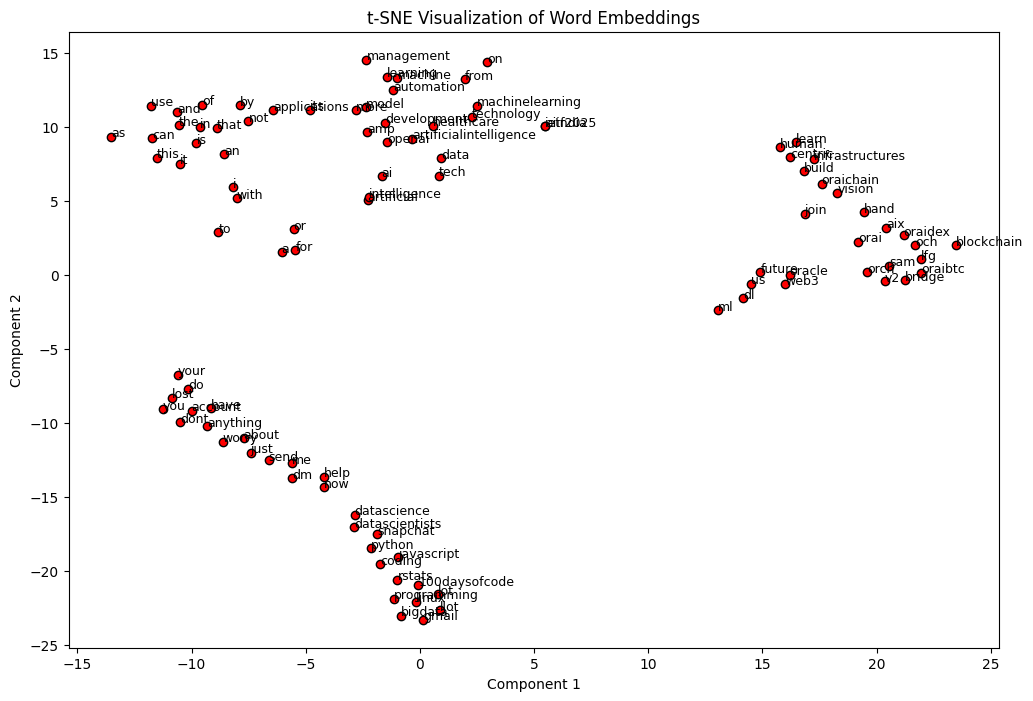


Cosine Similarities between selected word pairs:
Cosine similarity between 'ai' and 'artificial': 0.7477
Cosine similarity between 'ai' and 'intelligence': 0.8015
One or both words 'bitcoin' and 'blockchain' are not in the vocabulary.
Cosine similarity between 'data' and 'science': 0.9398
One or both words 'movie' and 'film' are not in the vocabulary.
One or both words 'happy' and 'joyful' are not in the vocabulary.
Cosine similarity between 'account' and 'recovery': 0.8857


In [9]:
# Write your code here


import csv
import string
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Utility Functions
def tokenize(text):
    """
    Lowercase, remove punctuation, and split text into tokens.
    """
    translator = str.maketrans('', '', string.punctuation)
    return text.lower().translate(translator).split()

def cosine_similarity(vec1, vec2):
    """
    Compute cosine similarity between two numpy vectors.
    """
    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot / (norm1 * norm2)

# Step 1: Load and Preprocess Data
documents = []
with open('cleaned_extracted_tweets.csv', 'r', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    # Use the "Tweet Text" column based on your CSV header.
    for row in reader:
        tweet = row['Tweet Text']
        if tweet.strip() != "":
            documents.append(tweet)

# Tokenize each tweet (each document becomes a list of tokens)
tokenized_docs = [tokenize(doc) for doc in documents]
print(f"Loaded and tokenized {len(tokenized_docs)} documents.")

# Train a 300-Dimensional Word2Vec Model
embedding_size = 300
# Using the skip-gram architecture (sg=1) as suggested by the reference.
model = Word2Vec(sentences=tokenized_docs, vector_size=embedding_size, window=5, min_count=2, sg=1, workers=4, epochs=50)
model.save("word2vec_tweets.model")
print("Word2Vec model training complete.")

# For visualization, we select the top 100 most frequent words from the vocabulary.
words = list(model.wv.index_to_key)[:100]
print(f"Visualizing embeddings for {len(words)} words.")

# Extract embeddings for the selected words.
embeddings = np.array([model.wv[word] for word in words])

# Reduce dimensions with PCA to 50 components (optional step to speed up t-SNE)
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings)



# Further reduce dimensions to 2 with t-SNE for visualization.
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=1000)
embeddings_tsne = tsne.fit_transform(embeddings_pca)

# Plot the 2D t-SNE visualization.
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], edgecolors='k', c='r')
for i, word in enumerate(words):
    plt.annotate(word, xy=(embeddings_tsne[i, 0], embeddings_tsne[i, 1]), fontsize=9)
plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# Calculate Cosine Similarity for Selected Word Pairs
word_pairs = [
    ("ai", "artificial"),
    ("ai", "intelligence"),
    ("bitcoin", "blockchain"),
    ("data", "science"),
    ("movie", "film"),
    ("happy", "joyful"),
    ("account", "recovery")
]

print("\nCosine Similarities between selected word pairs:")
for w1, w2 in word_pairs:
    if w1 in model.wv and w2 in model.wv:
        sim = cosine_similarity(model.wv[w1], model.wv[w2])
        print(f"Cosine similarity between '{w1}' and '{w2}': {sim:.4f}")
    else:
        print(f"One or both words '{w1}' and '{w2}' are not in the vocabulary.")





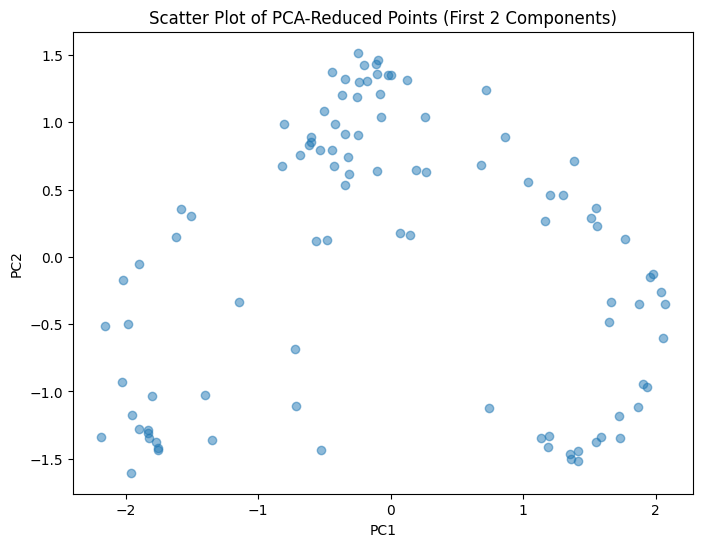

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PCA-Reduced Points (First 2 Components)')
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



I have lablled 10 reviews manualluy and for reemaning I have used CHATGPT to get labelleing done for the all remaining reviews.

CHATGPT PROMPT: I wanted to perform sentiment analysis for my dataset can you please read and review each tweet from my csv file and annotate each review as positive, negative or neutral and save data set file with three coloumns that is Document_id, clean_text, sentiment.

CHATGPT RESPONSE:

In [24]:
# The GitHub link of your final csv file


# Link: https://github.com/nikhiltejarudraram/Assignment-3/blob/main/annotated_tweets.csv

import pandas as pd
from textblob import TextBlob

# Load the CSV file
df = pd.read_csv('cleaned_extracted_tweets.csv')

# Rename the column containing the tweet text to "clean_text" for consistency
df = df.rename(columns={'Tweet Text': 'clean_text'})

# Assign a unique document ID to each tweet
df['document_id'] = range(1, len(df) + 1)

# Function to determine sentiment using TextBlob
def get_sentiment(text):
    # Calculate sentiment polarity (range: -1 to 1)
    polarity = TextBlob(text).sentiment.polarity
    # Define thresholds: adjust these values as needed
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

# Apply the sentiment function to each tweet
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Create a new DataFrame with only the necessary columns
annotated_df = df[['document_id', 'clean_text', 'sentiment']]

# Save the annotated data to a new CSV file
annotated_df.to_csv('annotated_tweets.csv', index=False)
print("Annotated tweets have been saved to 'annotated_tweets.csv'")



Annotated tweets have been saved to 'annotated_tweets.csv'


# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

This assignment proved challenging to me because I needed to oversee multiple workflow elements and build new NLP tasks.  I found immense satisfaction in both generating word embeddings and performing manual sentiment analysis although finding the assignment quite challenging. I got enough time to complete the assignemnt and overall its a good experience.